# Decision_Tree

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
Cancer = pd.read_csv("BreastCancer.csv")
Cancer.head()


,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [3]:
X = Cancer[Cancer.columns[1:10]]
y = Cancer[Cancer.columns[10]]

Import the necessary modules

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Create training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)



In [8]:
clf = DecisionTreeClassifier(random_state=2020,max_depth=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))

[[130   8]
 [  6  66]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.96      0.94      0.95       138
   Malignant       0.89      0.92      0.90        72

    accuracy                           0.93       210
   macro avg       0.92      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



In [11]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333


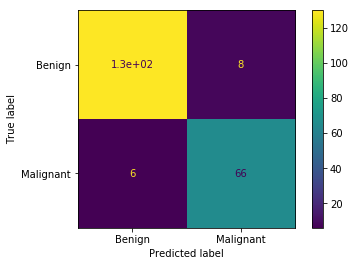

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,display_labels=['Benign','Malignant'])

***ROC***

Import necessary modules

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [27]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

***Ggraphviz*** 

In [28]:
import graphviz 
from sklearn import tree

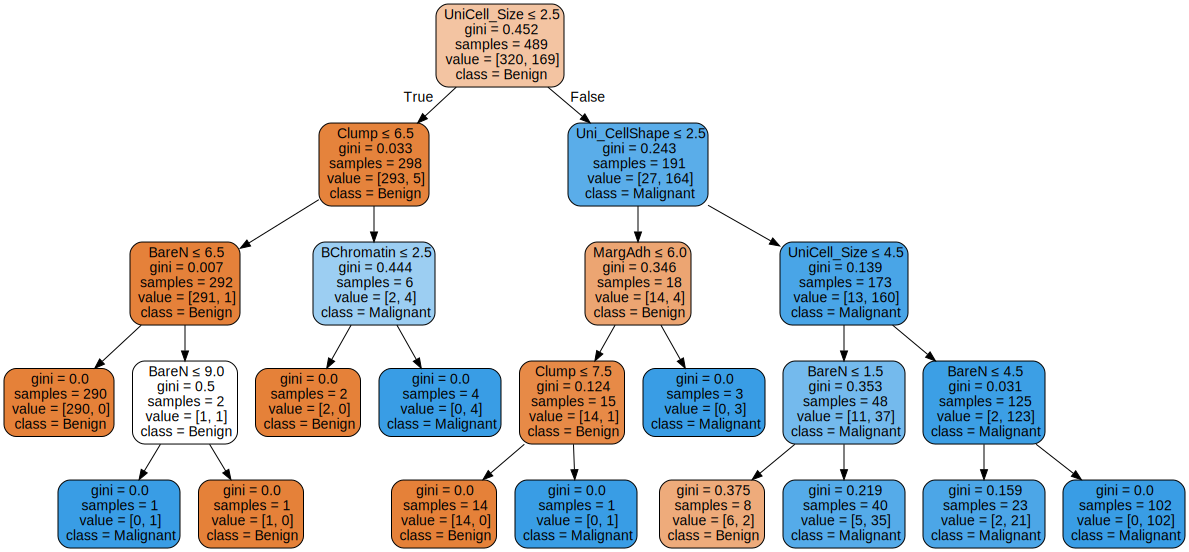

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['Benign','Malignant'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Grid Search CV

In [30]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [31]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2018)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X,y)

/Users/sujit.deokar/Documents/python_env/Rubiscape_stage/lib/python3.5/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2018,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
       

Best Parameters

In [32]:
print(cv.best_params_)

print(cv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 25}
0.9745351568721133


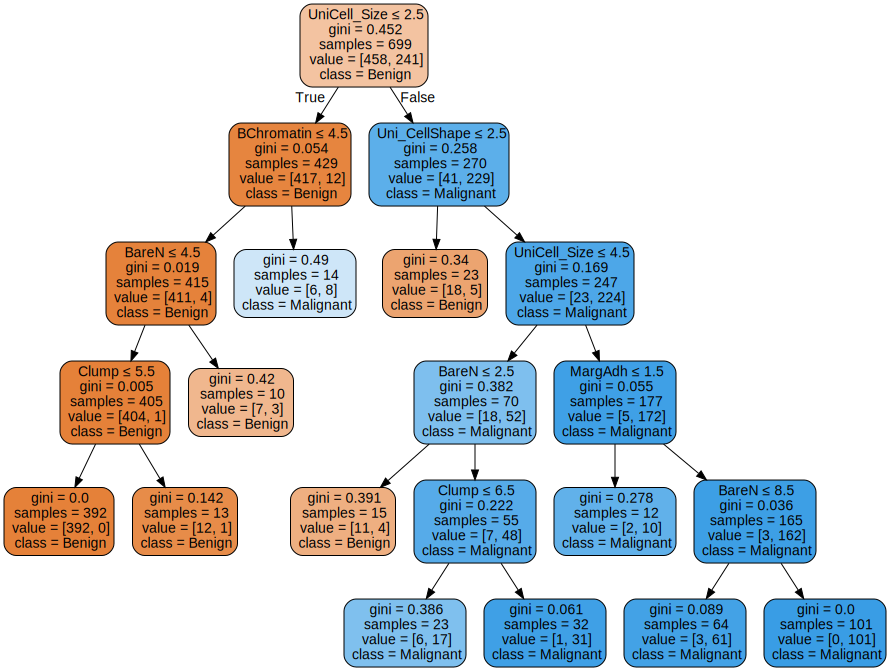

In [33]:
best_model = cv.best_estimator_
from sklearn import tree
dot_data = tree.export_graphviz(best_model, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['Benign','Malignant'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

OR

[Text(146.486,205.737,'UniCell_Size <= 2.5\ngini = 0.452\nsamples = 699\nvalue = [458, 241]\nclass = Benign'),
 Text(97.6571,168.33,'BChromatin <= 4.5\ngini = 0.054\nsamples = 429\nvalue = [417, 12]\nclass = Benign'),
 Text(73.2429,130.923,'BareN <= 4.5\ngini = 0.019\nsamples = 415\nvalue = [411, 4]\nclass = Benign'),
 Text(48.8286,93.5167,'Clump <= 5.5\ngini = 0.005\nsamples = 405\nvalue = [404, 1]\nclass = Benign'),
 Text(24.4143,56.11,'gini = 0.0\nsamples = 392\nvalue = [392, 0]\nclass = Benign'),
 Text(73.2429,56.11,'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = Benign'),
 Text(97.6571,93.5167,'gini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Benign'),
 Text(122.071,130.923,'gini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = Malignant'),
 Text(195.314,168.33,'Uni_CellShape <= 2.5\ngini = 0.258\nsamples = 270\nvalue = [41, 229]\nclass = Malignant'),
 Text(170.9,130.923,'gini = 0.34\nsamples = 23\nvalue = [18, 5]\nclass = Benign'),
 Text(219.729,130.923,'UniCell_Size <= 4.5\

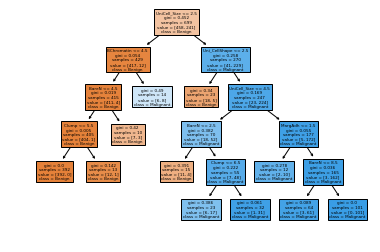

In [34]:
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=['Benign','Malignant'],
               filled=True) 

Ploting

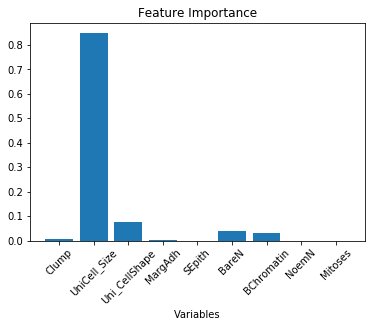

In [35]:
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(9)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()